In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city_data = pd.read_csv (city_data_to_load)
#df_city_data.head()

df_rideshare_data = pd.read_csv (ride_data_to_load)
#df_rideshare_data.head()
# Combine the data into a single dataset
df_cityride_data = pd.merge (df_city_data, df_rideshare_data)


# Display the data table for preview
df_cityride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [ ]:
#df_cityride_data.columns
df_final_combined=df_cityride_data.groupby(["city","driver_count","type"], as_index=False).agg({'ride_id':np.size,'fare':np.mean})
df_final_combined = df_final_combined.rename(columns={"ride_id":"ride_count","fare":"fare_mean"})
df_final_combined.head()


In [2]:
#df_cityride_data.columns
df_final_combined=df_cityride_data.groupby(["city","driver_count","type"], as_index=False).agg({'ride_id':np.size,'fare':np.mean})
df_final_combined = df_final_combined.rename(columns={"ride_id":"ride_count","fare":"fare_mean"})
df_final_combined.head()


,city,driver_count,type,ride_count,fare_mean
0,Amandaburgh,12,Urban,18,24.641667
1,Barajasview,26,Urban,22,25.332273
2,Barronchester,11,Suburban,16,36.422500
3,Bethanyland,22,Suburban,18,32.956111
4,Bradshawfurt,7,Rural,10,40.064000


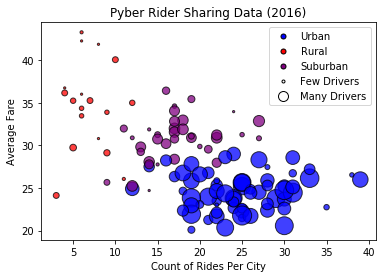

In [38]:
#Scatter plot of avg fare Y vs rides X
x_axis = df_final_combined["ride_count"]
y_axis = df_final_combined["fare_mean"]
# def getColor(city_type):
#     if(city_type == "Urban"):
#         return "blue"
#     if(city_type == "Rural"):
#         return "red"
#     if(city_type == "Suburban"):
#         return "purple"

getColor={"Urban":"blue","Rural":"red","Suburban":"purple","Few Drivers":"white","Many Drivers":"white"}
#Labels
plt.title("Pyber Rider Sharing Data (2016)")
plt.xlabel("Count of Rides Per City")
plt.ylabel("Average Fare")

Colors=[getColor[city_type] for city_type in df_final_combined["type"]]
markersize = [5,5,5,3,10]
markers = [plt.Line2D([0,0],[0,0],color=color, marker="o", markersize=size, markeredgecolor="black", linestyle="") for (color,size) in zip(getColor.values(),markersize)]
plt.legend(markers, getColor.keys())
plt.scatter(x_axis, y_axis, marker="o", facecolors=Colors, edgecolors="black", alpha=0.75, s=df_final_combined["driver_count"]*5)
#plt.show()
plt.savefig("HW4_Final_Plot.png")

In [22]:
# Mean method to find average ride cost per city, then need to plot
df_avg_fare=df_cityride_data.groupby(["city"],as_index=False)["fare"].mean()
df_avg_fare
#df_sortfare=df_avg_fare.sort_values("fare", ascending=False)
#df_sortfare.head()

,city,fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000
5,Brandonfort,35.437368
6,Carriemouth,28.314444
7,Christopherfurt,24.501852
8,Colemanland,30.894545
9,Davidfurt,31.995882


In [32]:
df_combined_rideshares = pd.merge(df_avg_fare, df_rideshare_sort, how='outer', on=["city"])
df_combined_rideshares.head()


,city,fare_x,driver_count,type,date,fare_y,ride_id
0,Amandaburgh,24.641667,12,Urban,2018-01-13 16:04:10,23.35,9975084532253
1,Amandaburgh,24.641667,12,Urban,2018-04-05 10:22:33,25.55,8581415267582
2,Amandaburgh,24.641667,12,Urban,2018-04-24 08:02:27,14.55,7836117055007
3,Amandaburgh,24.641667,12,Urban,2018-02-06 10:02:30,11.93,7550325158038
4,Amandaburgh,24.641667,12,Urban,2018-01-11 02:22:07,29.24,7279902884763


In [25]:
#Determine number of cities to use for x-axis data "city id"
df_farecount = df_avg_fare.count
df_farecount

<bound method DataFrame.count of                      city       fare
0             Amandaburgh  24.641667
1             Barajasview  25.332273
2           Barronchester  36.422500
3             Bethanyland  32.956111
4            Bradshawfurt  40.064000
5             Brandonfort  35.437368
6             Carriemouth  28.314444
7         Christopherfurt  24.501852
8             Colemanland  30.894545
9               Davidfurt  31.995882
10              Deanville  25.842632
11         East Aaronbury  25.661111
12        East Danielview  31.560588
13        East Kaylahaven  23.757931
14          East Kentstad  29.823077
15         East Marymouth  30.835185
16              Erikaland  24.906667
17              Garzaport  24.123333
18            Grahamburgh  25.221200
19              Grayville  27.763333
20         Harringtonfort  33.470000
21            Huntermouth  28.993750
22            Hurleymouth  25.891429
23               Jerryton  25.649200
24            Jessicaport  36.013333
25   

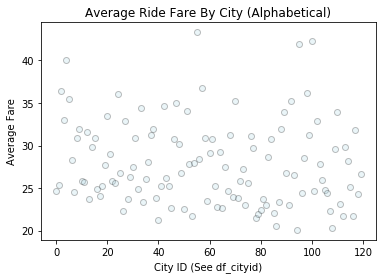

In [17]:
# Tell matplotlib to create a scatter plot based upon the above dataframe and x-axis city id
x_axis = np.arange(0, 120, 1)
y_axis = df_avg_fare["fare"]

#Labels
plt.title("Average Ride Fare By City (Alphabetical)")
plt.xlabel("City ID (See df_cityid)")
plt.ylabel("Average Fare")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.25)
plt.show()
#old ideas - df_avgfare_over_city.plot(x="fare", y="city", kind='scatter', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False,)
#old ideas - plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")




ValueError: can not merge DataFrame with instance of type <class 'method'>

In [ ]:
#Still to use later?
# BONUS: With scoop_price set to the scalar value
# scoop_price = [89, 18, 10, 28, 79, 46, 29, 38, 89, 26, 45, 62]
# plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black", s=scoop_price)

In [43]:
df_rides_per_city = rides_per_city_series.rename_axis('city').reset_index(name='rides_per_city')
print (df_rides_per_city)

                     city  rides_per_city
0             West Angela              39
1         South Karenland              38
2             North Jason              35
3              Port Frank              33
4                Liumouth              33
5           South Evanton              31
6           South Phillip              31
7             West Robert              31
8      South Michelleport              31
9            West Anthony              30
10    New Kimberlyborough              30
11          North Jasmine              30
12             Justinberg              30
13                Royland              30
14        East Kaylahaven              29
15            Hurleymouth              28
16             West Heidi              28
17              Karenside              28
18            Richardfort              28
19              Loganberg              28
20         East Marymouth              27
21        Christopherfurt              27
22             Josephside         

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [6]:
#df_cityride_data.columns
df_pie_data=df_cityride_data.groupby(["city","driver_count","type"], as_index=False).agg({'ride_id':np.size,'fare':np.sum})
df_pie_data.head()


,city,driver_count,type,ride_id,fare
0,Amandaburgh,12,Urban,18,443.55
1,Barajasview,26,Urban,22,557.31
2,Barronchester,11,Suburban,16,582.76
3,Bethanyland,22,Suburban,18,593.21
4,Bradshawfurt,7,Rural,10,400.64


In [7]:
#df_cityride_data.columns
df_pie_data=df_pie_data.groupby(["type"], as_index=False).agg({'ride_id':np.sum,'driver_count':np.sum,'fare':np.sum})
df_pie_data.head()


,type,ride_id,driver_count,fare
0,Rural,125,78,4327.93
1,Suburban,625,490,19356.33
2,Urban,1625,2405,39854.38


In [8]:
df_pie_data.sum()

type            RuralSuburbanUrban
ride_id                       2375
driver_count                  2973
fare                       63538.6
dtype: object

In [9]:
df_total = df_pie_data.agg({'ride_id':np.sum, 'driver_count':np.sum, 'fare':np.sum})
df_total

ride_id          2375.00
driver_count     2973.00
fare            63538.64
dtype: float64

In [30]:
labels=["Rural", "Suburban", "Urban"]
colors=["orange", "cyan", "red"]
explode=(0.0,0.1,0.0)


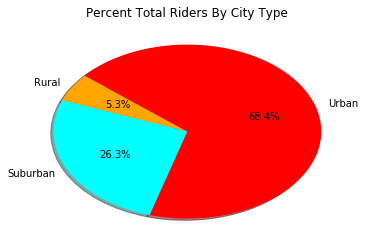

In [31]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Percent Total Riders By City Type")
plt.pie(df_pie_data['ride_id'], labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("HW4_Final_Pie1.png")

In [32]:
labels=["Rural", "Suburban", "Urban"]
colors=["orange", "cyan", "red"]
explode=(0.0,0.1,0.0)


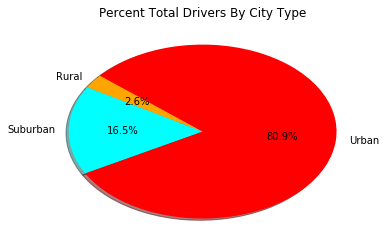

In [33]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Percent Total Drivers By City Type")
plt.pie(df_pie_data['driver_count'], labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("HW4_Final_Pie2.png")

In [34]:
labels=["Rural", "Suburban", "Urban"]
colors=["orange", "cyan", "red"]
explode=(0.0,0.1,0.0)


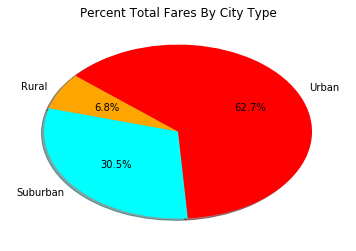

In [35]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Percent Total Fares By City Type")
plt.pie(df_pie_data['fare'], labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("HW4_Final_Pie3.png")

In [29]:
# Final Analysis of Trends:
# 1. A pattern the bubble plot brings out is the relationshp between urban areas which show significantly higher rides and driver count and, their fares which are much less.
# 2. Even with lower average fares the urban types of cities are still double in fares of suburban cities.
# 3. Even with urban cities being typically more densly populated, both urban and suburban cities overlap significantly in their average rides. 

SyntaxError: invalid syntax (<ipython-input-29-55d0701e1328>, line 1)